<a href="https://colab.research.google.com/github/Datawithabhishek/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project-3**

# Supervised-Classification

# **Project - Mobile Price Range Prediction**

# **Participants Name**

**ABHISHEK JAIN**

**KHUSHBOO CHAURASIYA**

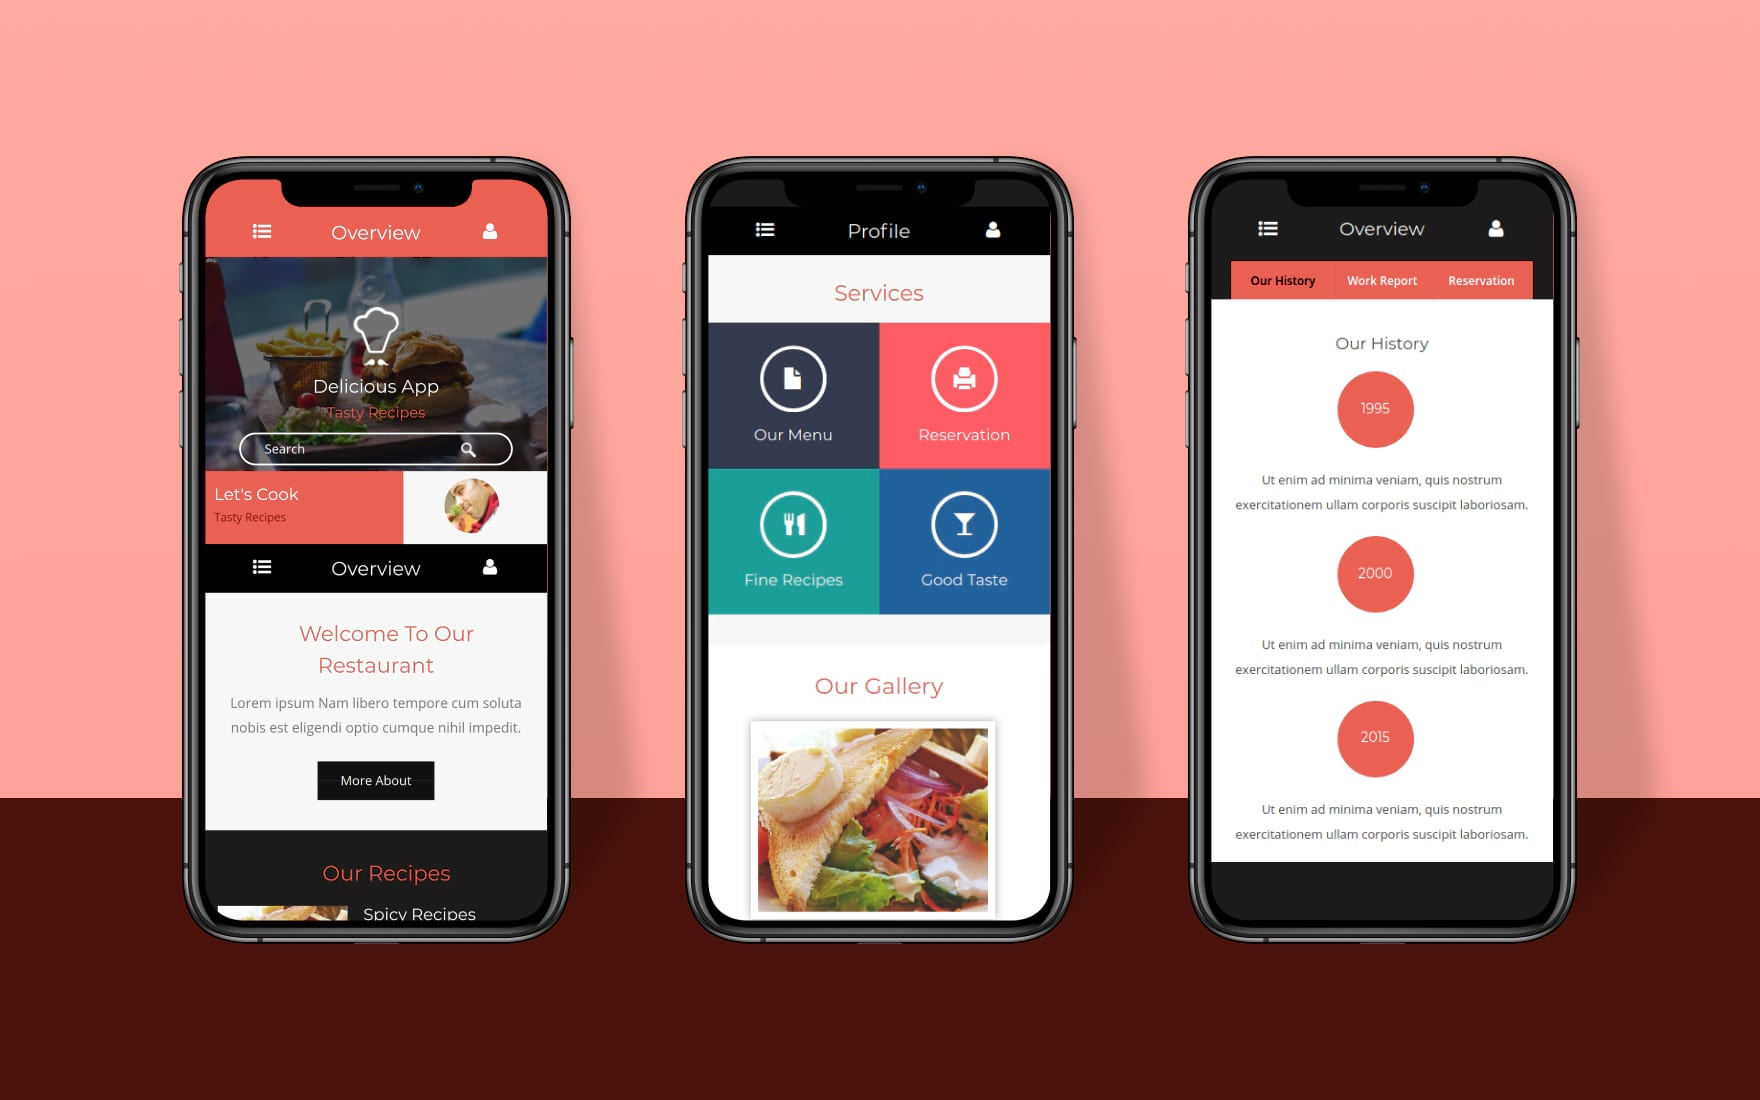

# **Github Link:-**

**ABHISHEK JAIN**  [https://github.com/Klearpixeloff/Mobile-Price-Range-Prediction](https://github.com/Klearpixeloff/Mobile-Price-Range-Prediction)

**KHUSHBOO CHAURASIYA** [https://github.com/Geniuskhushboo/Mobile-Range-Price-Prediction](https://github.com/Geniuskhushboo/Mobile-Range-Price-Prediction)




# Business Context

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some reltaion between features of a mobile phone(eg:- RAM,internal Memory,etc) and its selling price.In this problem,we do not have to predict the actual price but a price range indicating how high the price is.

# Importing Libraries

In [99]:
pip install xgboost

In [100]:
#Basic Operations
import pandas as pd # data operation and data Wrangling
import numpy as np # number operation in array

#visualizing libraries
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation


#data preprocessing
from sklearn.preprocessing import StandardScaler # standardization for feature scaling
from sklearn.model_selection import GridSearchCV # for hyperparameter tunning
from sklearn.model_selection import train_test_split # split the data into train and test
from sklearn.model_selection import RandomizedSearchCV #for hyperparameter tunning


#Model
from sklearn.neighbors import KNeighborsClassifier #knn
from xgboost import XGBClassifier # xgboost
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.svm import SVC # support vector machine
from sklearn.ensemble import StackingClassifier # stacking


#evaluators
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report # for evaluation metrics


import warnings
warnings.filterwarnings('ignore') # ignore the warning


# Data Understanding

**Battery_power -** Total energy a battery can store in one time measured in mAh

**Blue -** Has bluetooth or not

**Clock_speed -** speed at which microprocessor executes instructions

**Dual_sim -** Has dual sim support or not

**Fc -** Front Camera mega pixels

**Four_g -** Has 4G or not

**Int_memory -** Internal Memory in Gigabytes

**M_dep -** Mobile Depth in cm

**Mobile_wt -** Weight of mobile phone

**N_cores -** Number of cores of processor

**Pc -** Primary Camera mega pixels

**Px_height -** Pixel Resolution Height

**Px_width -** Pixel Resolution Width

**Ram -** Random Access Memory in Mega

**Touch_screen -** Has touch screen or not

**Sc_h -** Screen Height of mobile in cm

**Sc_w -** Screen Width of mobile in cm

**Talk_time -** longest time that a single battery charge will last over a call

**Three_g -** Has 3G or not

**Wifi -** Has wifi or not

**Price_range -** This is the target variable with value of 0(Cheap), 1(Mid range smartphone),2(High Mid range smartphone) and 3(Expensive Phones)

# Dataset Loading and Cleanup

In [101]:
#loading the data
df = pd.read_csv('https://raw.githubusercontent.com/Datawithabhishek/Mobile-Price-Range-Prediction/main/data_mobile_price_range.csv')

In [102]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [103]:
df.shape # 2000 rows and 21 features

(2000, 21)

In [104]:
df.size #2000*21

42000

In [105]:
df.isnull().sum() #check the null values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [106]:
df.info() # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [107]:
#Transpose the describe the dataframe
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [108]:
df['price_range'].value_counts() # check the class imbalance

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# Feature Engineering

In [109]:
#Created a feature by combining px_height and px_width, hence we dropped both features.
df['Pixels Dimension']=df['px_height']*df['px_width']

df.drop(columns=['px_height','px_width'],inplace=True)

In [110]:
#Created a feature by combining sc_h and sc_w, hence we dropped both features.
df['Screen Dimension'] = df['sc_h']* df['sc_w']
df.drop(columns=['sc_h','sc_w'],inplace=True)

In [111]:
df.rename(columns={'battery_power':'Battery','blue':'Bluetooth','clock_speed':'Clock_Speed','dual_sim':'Dual_Sim','fc':'Front_Camera','four_g':'4G','int_memory':'Rom','m_dep':'Mobile_Depth','mobile_wt':'Mobile_weight',
                   'n_cores':'Number_of_cores','pc':'Primary_Camera','ram':'Ram','talk_time':'Talk_Time','three_g':'3G','touch_screen':'Touch_Screen','wifi':'Wi-Fi','price_range':'Price_range'},inplace=True)

In [112]:
df = df[['Battery', 'Bluetooth', 'Clock_Speed', 'Dual_Sim', 'Front_Camera', '4G',
       'Rom', 'Mobile_Depth', 'Mobile_weight', 'Number_of_cores',
       'Primary_Camera', 'Ram', 'Talk_Time', '3G', 'Touch_Screen', 'Wi-Fi',
        'Pixels Dimension', 'Screen Dimension','Price_range']]

# EDA

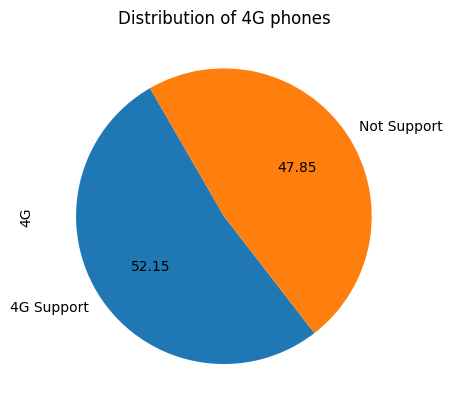

In [113]:
plt.title('Distribution of 4G phones')
df['4G'].value_counts().plot(kind='pie',autopct='%.2f',labels=['4G Support','Not Support'],startangle=120)
plt.show()

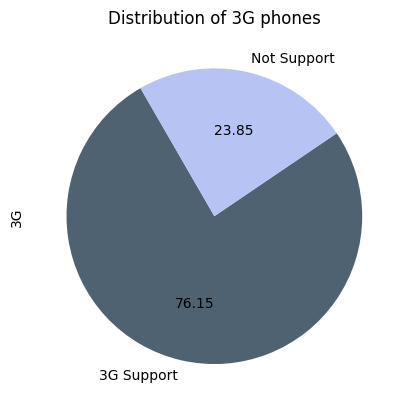

In [114]:
plt.title('Distribution of 3G phones')
colors =['#4F6272', '#B7C3F3']
df['3G'].value_counts().plot(kind='pie',autopct='%.2f',labels=['3G Support','Not Support'],startangle=120,colors=colors)
plt.show()

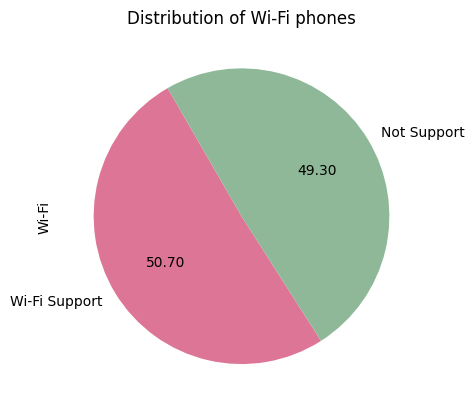

In [115]:
plt.title('Distribution of Wi-Fi phones')
colors = ['#DD7596', '#8EB897']
df['Wi-Fi'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Wi-Fi Support','Not Support'],startangle=120,colors = colors)
plt.show()

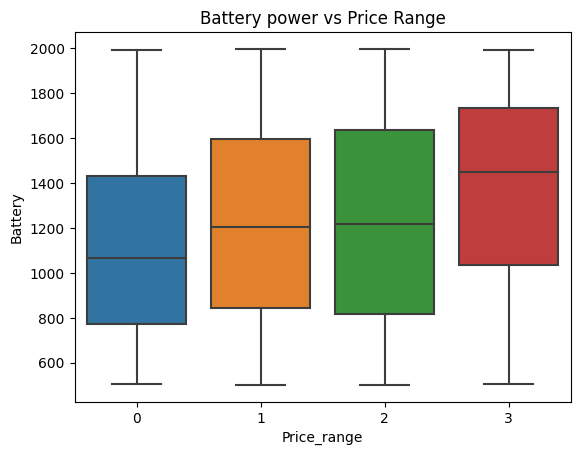

In [116]:
sns.boxplot(x='Price_range',y='Battery',data=df)
plt.title('Battery power vs Price Range')
plt.show()


Text(0.5, 0, 'MegaPixels')

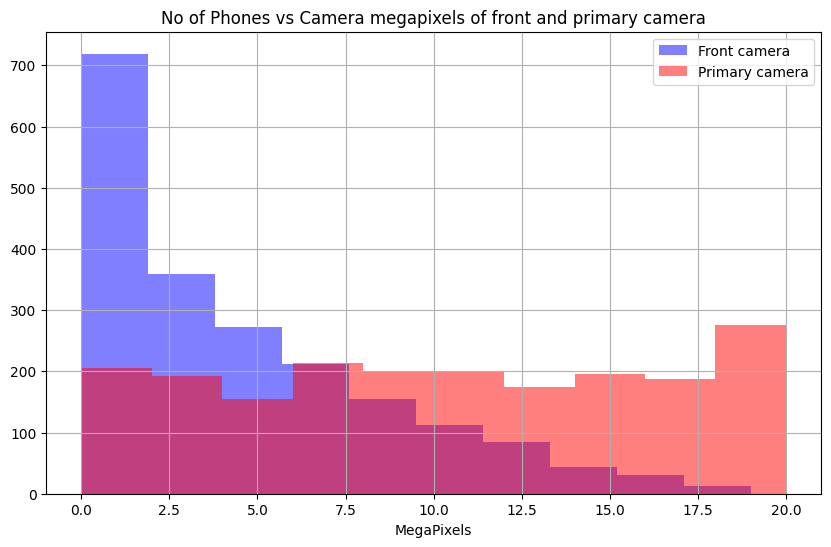

In [117]:
plt.figure(figsize=(10,6))
df['Front_Camera'].hist(alpha=0.5,color='blue',label='Front camera')
df['Primary_Camera'].hist(alpha=0.5,color='red',label='Primary camera')
plt.title("No of Phones vs Camera megapixels of front and primary camera")
plt.legend()
plt.xlabel('MegaPixels')

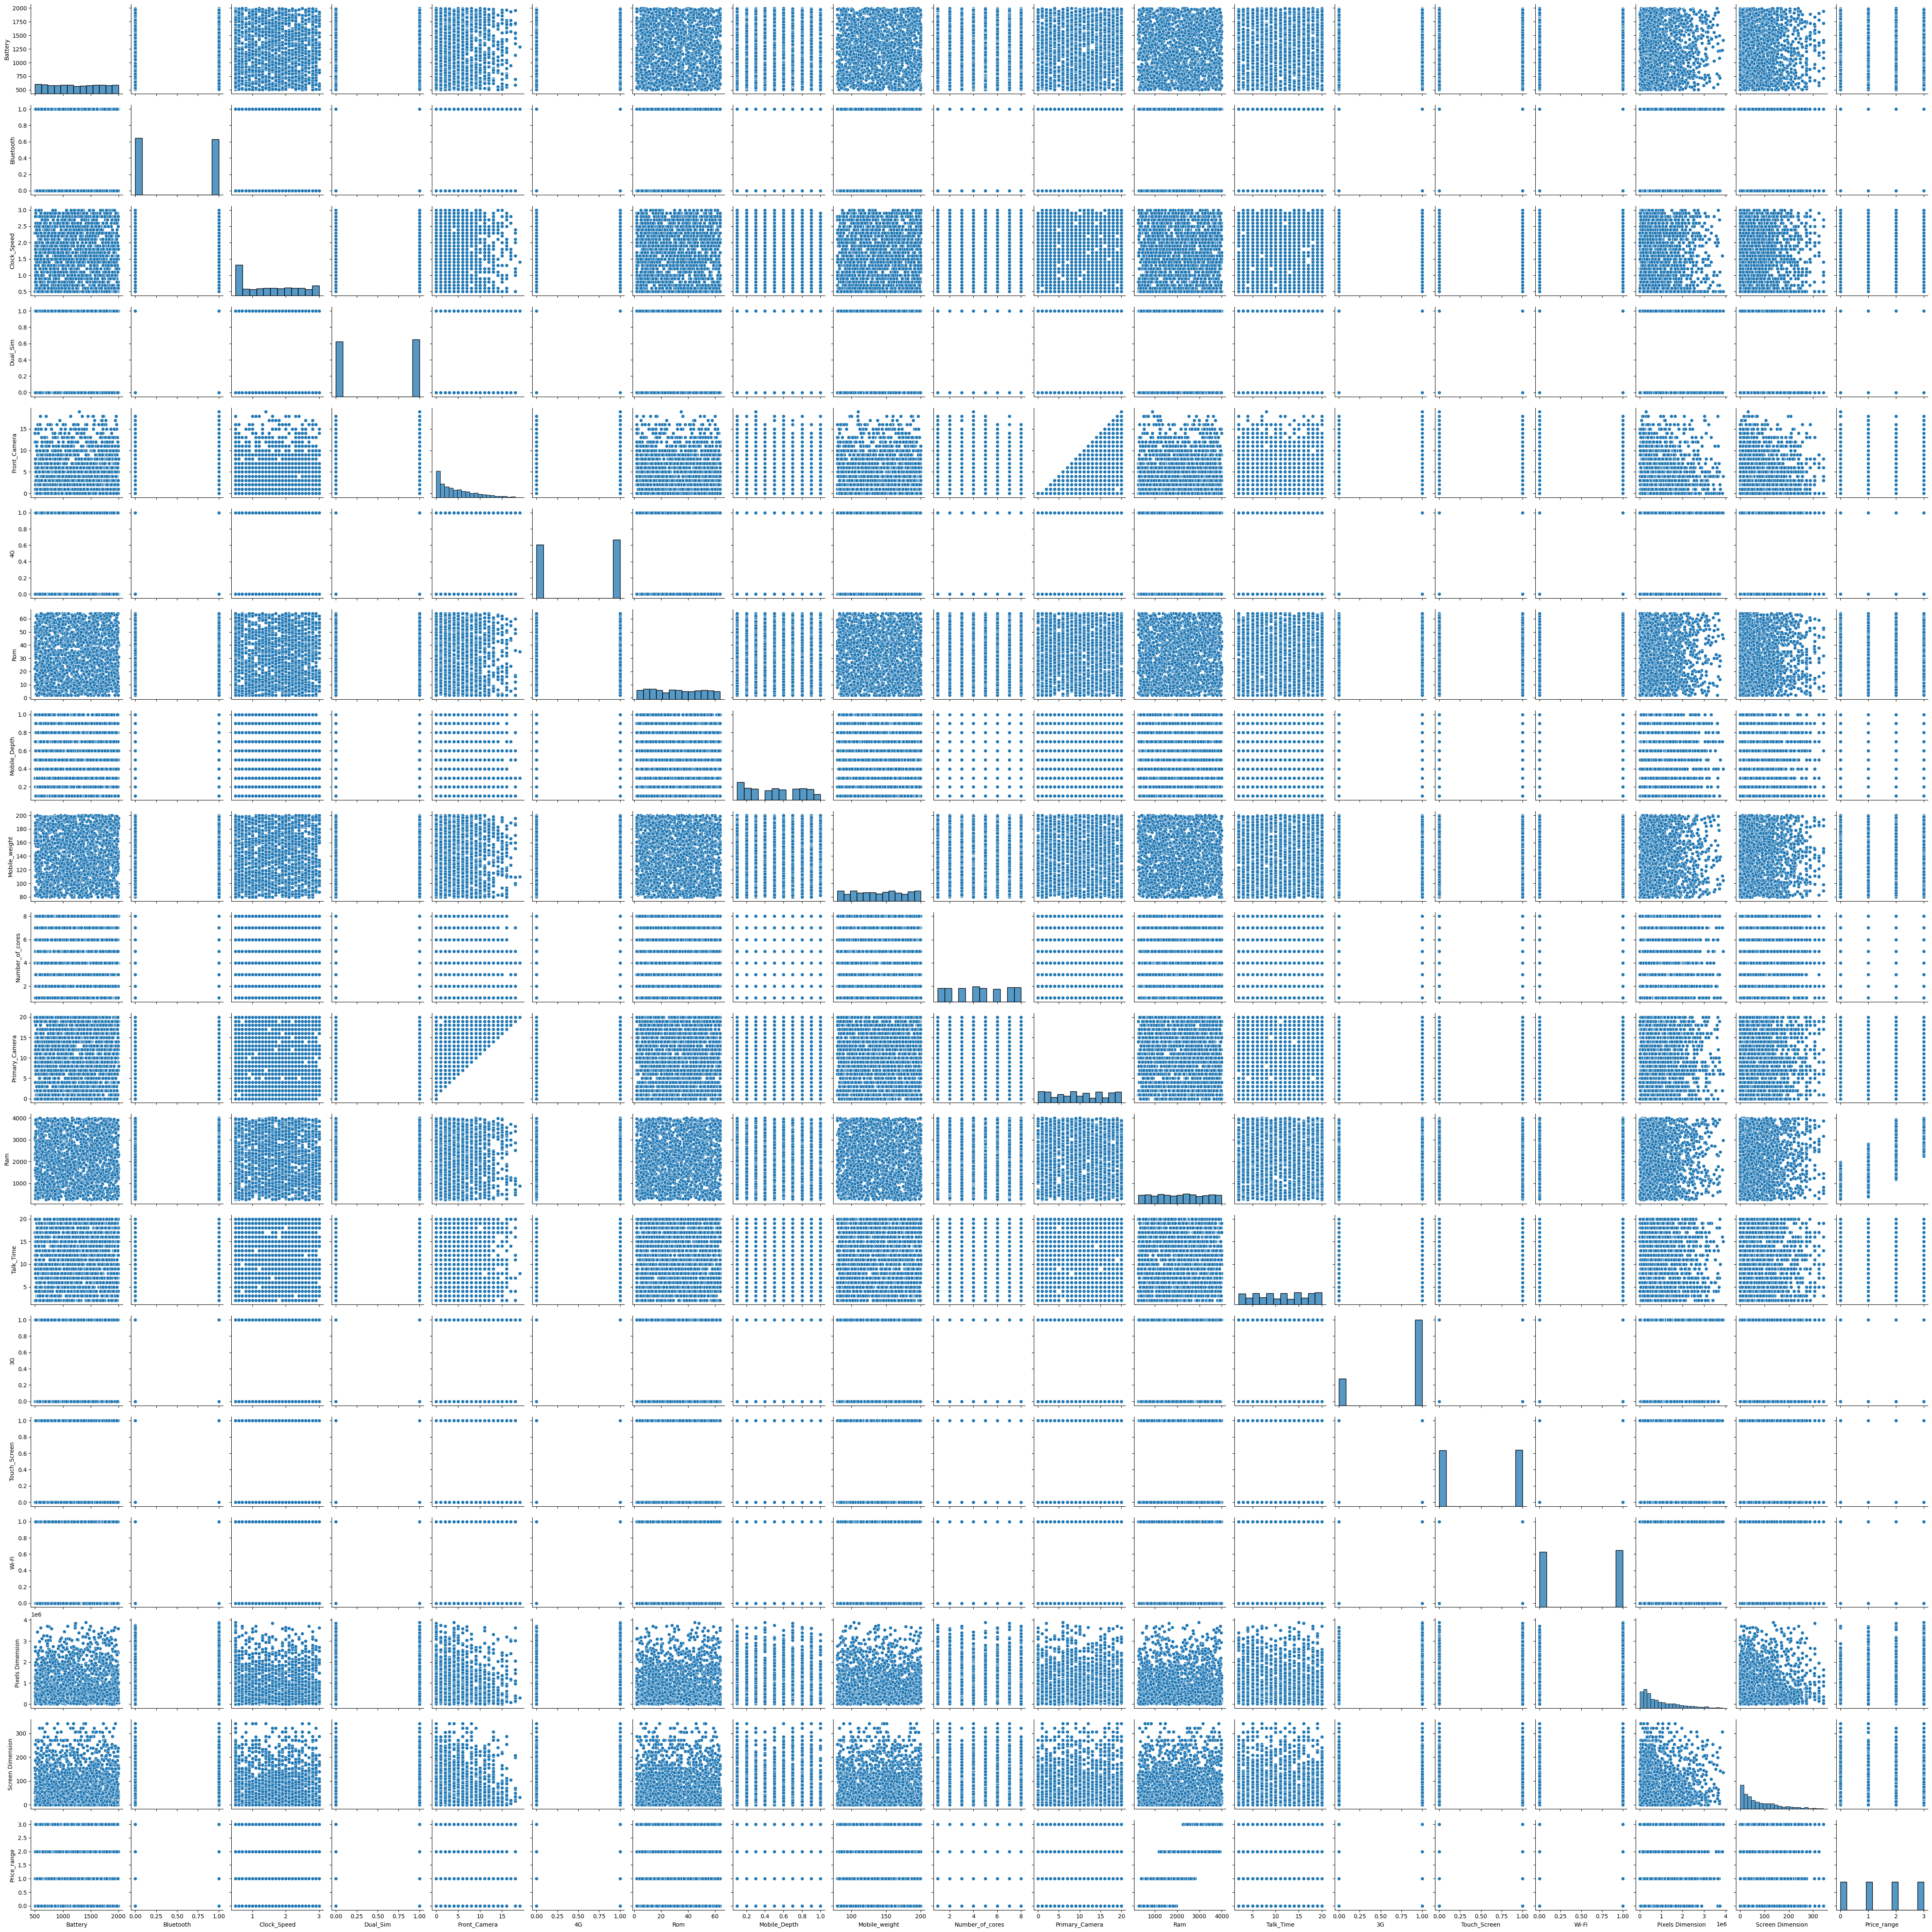

In [118]:

sns.pairplot(df)

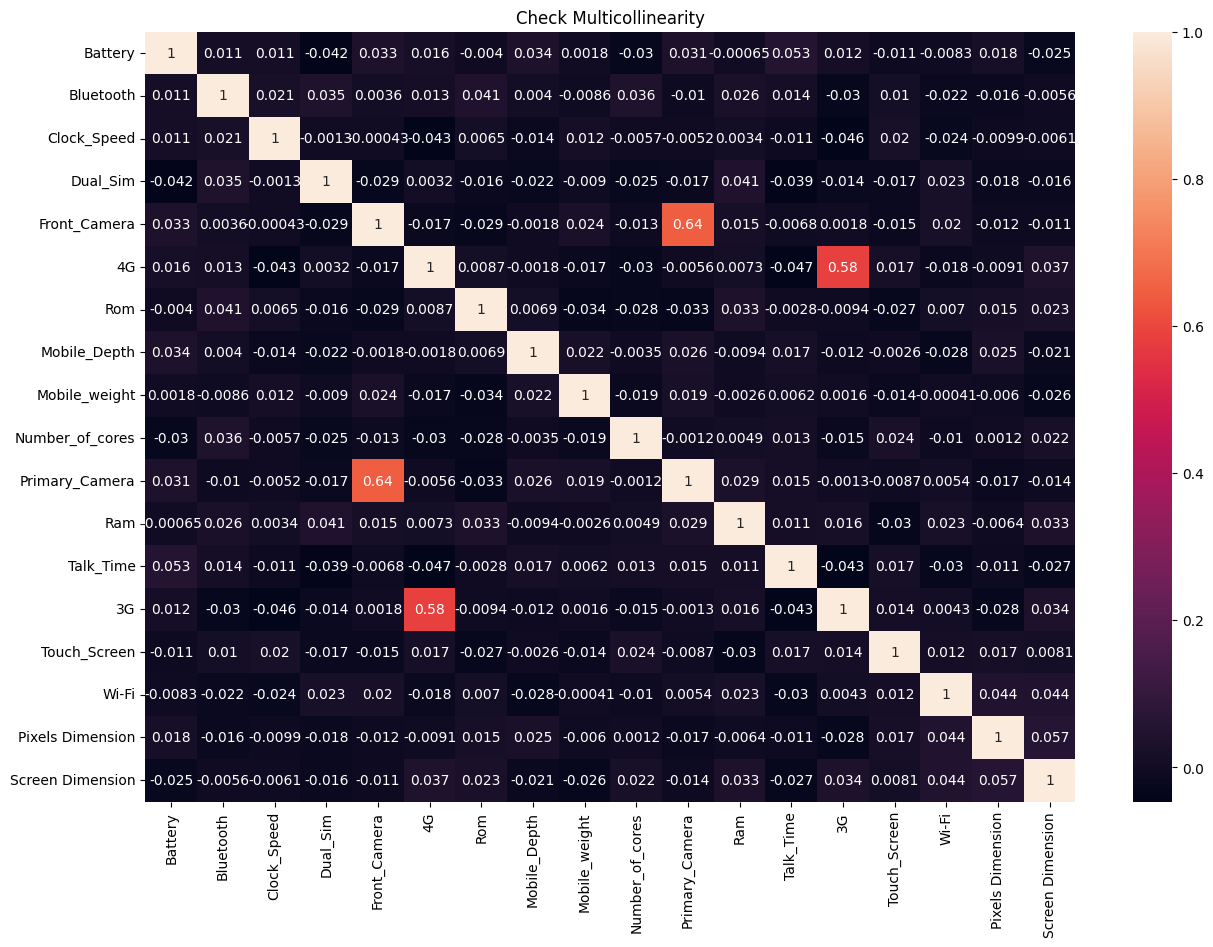

In [119]:
plt.figure(figsize=(15,10))
plt.title('Check Multicollinearity')
sns.heatmap(df.iloc[:,0:-1].corr(),annot=True)
plt.show()

#Data Preprocessing

In [120]:
#Defined price_range as dependent variable and rest all the features as independent variable
dependent_variable ='Price_range'
independent_varaible = list(set(df.columns.tolist())-{dependent_variable})

In [121]:
# stored the independent and dependent values in x and y variable respectively
x=df[independent_varaible].values
y=df[dependent_variable].values

In [122]:
# split the data into 4 parts x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

**Feature scalling**

In [123]:
#Created an object for StandardScaler
stand = StandardScaler()

In [124]:
#Scalling
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)

#Model Implementation


### **MODEL -1 (K NEAREST NEIGHBORS)**

In [125]:
#find the value of k.
error=[]
for i in range(1,1000):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  knn_pred = knn.predict(x_test)
  error.append(np.mean(knn_pred!=y_test))

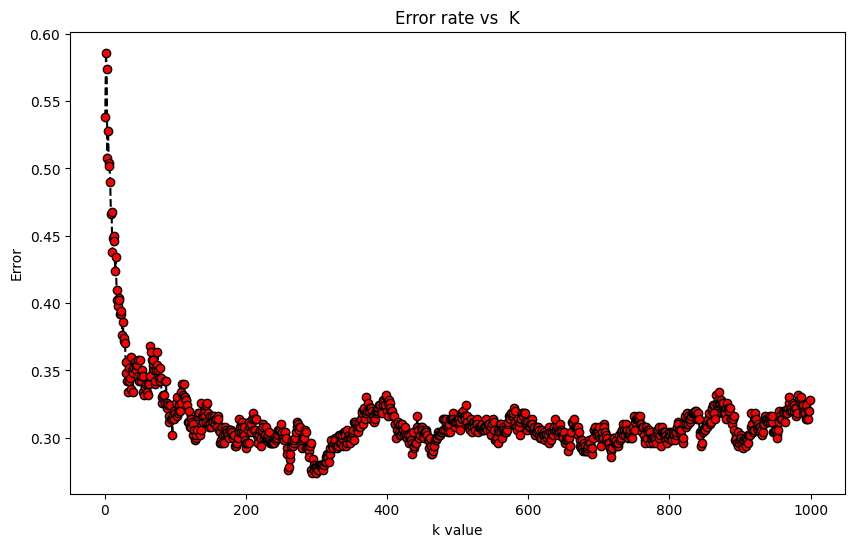

minimum error  0.274 at the value of k = 294


In [126]:
#Plotting line plot.
plt.figure(figsize=(10,6))
plt.plot(range(1,1000),error,color='black',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('Error rate vs  K')
plt.xlabel('k value')
plt.ylabel('Error')
plt.show()
print("minimum error ",min(error),"at the value of k =",error.index(min(error))+1)

In [127]:
#Created an object for KNN.
knn = KNeighborsClassifier(n_neighbors=273,p=1,weights='distance',metric= 'manhattan')

In [128]:
# Trained the model
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=273, p=1,
                     weights='distance')

In [129]:
#Model Prediction
knn_pred = knn.predict(x_test)

In [130]:
#Checking accuracy
knn_accuracy = accuracy_score(knn_pred,y_test)
knn_accuracy

0.752

### **Model-2** **Naive Bayes**

In [131]:
#Created an object for GaussianNB
nb=GaussianNB()

In [132]:
#Trained the model
nb.fit(x_train,y_train)

GaussianNB()

In [133]:
#Model Prediction
nb_pred = nb.predict(x_test)

In [134]:
#Checked the accuracy of the model
nb_accuracy = accuracy_score(nb_pred,y_test)
nb_accuracy

0.808

### **Model-3** **XgBoost**

In [135]:
#Set the parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
  "min_child_weight" : [ 1, 3, 5, 7 ],
  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

 }

In [136]:
#Hyperparameter tunning and trained the model
xgb= XGBClassifier()


random_search= RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy', verbose=3)

In [137]:
#Got the best parameters
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [138]:
#Best Estimator
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [139]:
#Model prediction
xgb_pred = random_search.predict(x_test)

In [140]:
#Checked the accuracy
xg_boost_accuracy = accuracy_score(xgb_pred,y_test)

In [141]:
xg_boost_accuracy

0.908

### **Model -4 Support Vector Machine**

In [142]:
#Set the parameters
svc_params = {'C':range(5,10,2),
              'kernel':['rbf','linear', 'poly', 'sigmoid',]}

In [143]:
#Hyperparameter tunning and trained the model
svc_cv  = GridSearchCV(SVC(),param_grid=svc_params,cv=5,verbose=True,scoring='accuracy',n_jobs=-1)
svc_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(5, 10, 2),
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=True)

In [144]:
#got best parameters
svc_cv.best_params_

{'C': 5, 'kernel': 'linear'}

In [145]:
#Trained the model after using best parameters
scv =SVC(C=5,kernel='linear')
scv.fit(x_train,y_train)

SVC(C=5, kernel='linear')

In [146]:
#Model prediction
scv_pred = scv.predict(x_test)

In [147]:
#Checked the accuracy of the model
scv_accuracy = accuracy_score(scv_pred,y_test)

In [148]:
scv_accuracy

0.936

### **Model-5 Stacking**

In [149]:
#Set base models and final estimator
estimators = [('gbc',GradientBoostingClassifier()),('xgb',XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=15,
              min_child_weight=3, objective='multi:softprob')),
       ('bc',BaggingClassifier(base_estimator= SVC(C= 5, kernel= 'linear'),
 bootstrap= True,
 bootstrap_features= True,
 max_features= 1.0,
 max_samples= 0.8,
 n_estimators= 20))]

In [150]:
#Hyper parameter tunning
sc= StackingClassifier(estimators=estimators,passthrough=True,n_jobs=-1)

In [151]:
#Trained the model
sc.fit(x_train,y_train)

StackingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.3,
                                              grow_policy=None,
                                              importance_type=None,
                                              int...
                                              max_delta_step=None, max_depth=15,
                                              max_leaves=None,
                                              min_child_weight=3, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)),
                               ('bc',
                                BaggingClassifier(base_estimator=SVC(C=5,
                                                                     kernel='linear'),
                                                  bootstrap_features=True,
                                                  max_samples=0.8,
                                                  n_estimators=20))],
                   n_jobs=-1, passthrough=True)

In [152]:
#Model prediction
sc_pred = sc.predict(x_test)

In [153]:
#Checked accuracy
sc_accuracy=accuracy_score(sc_pred,y_test)

In [154]:
sc_accuracy

0.938

#Evaluation

In [155]:
#set all the accuracy in data frame
evaluation = pd.DataFrame(data={'Model':['KNN classifier','Naive Bays','xgboost','Support Vector Machine','Stacking'], 'accuracy':[knn_accuracy,nb_accuracy,xg_boost_accuracy,scv_accuracy,sc_accuracy]})


In [156]:
#sorting
evaluation=evaluation.sort_values(by=['accuracy'],ascending=False).reset_index(drop=True)

In [157]:
evaluation

Model  accuracy
0                Stacking     0.938
1  Support Vector Machine     0.936
2                 xgboost     0.908
3              Naive Bays     0.808
4          KNN classifier     0.752

In [158]:
# confusion_matrix
def conf(x,y):
  sns.heatmap(confusion_matrix(x,y_test),annot=True)
  plt.title(y)
  plt.show()

def classi(x,y):
  print(y)
  print(classification_report(x,y_test))

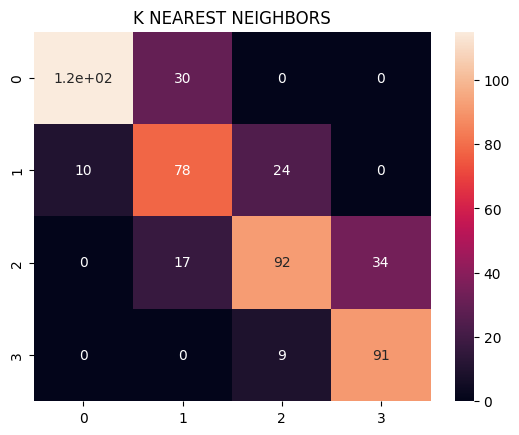

In [159]:
conf(knn_pred,'K NEAREST NEIGHBORS')

In [160]:
classi(knn_pred,'K NEAREST NEIGHBORS')

K NEAREST NEIGHBORS
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       145
           1       0.62      0.70      0.66       112
           2       0.74      0.64      0.69       143
           3       0.73      0.91      0.81       100

    accuracy                           0.75       500
   macro avg       0.75      0.76      0.75       500
weighted avg       0.76      0.75      0.75       500



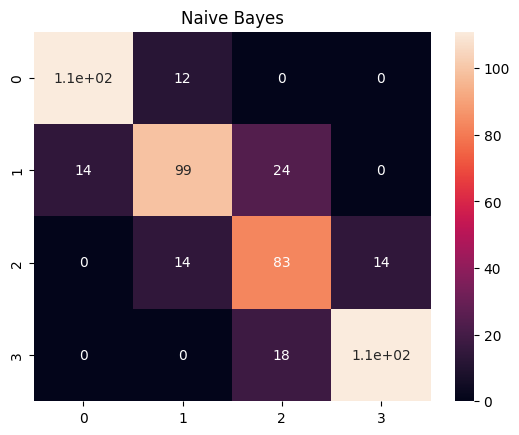

In [161]:
conf(nb_pred,'Naive Bayes')

In [162]:
classi(nb_pred,'Naive Bayes')

Naive Bayes
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       123
           1       0.79      0.72      0.76       137
           2       0.66      0.75      0.70       111
           3       0.89      0.86      0.87       129

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



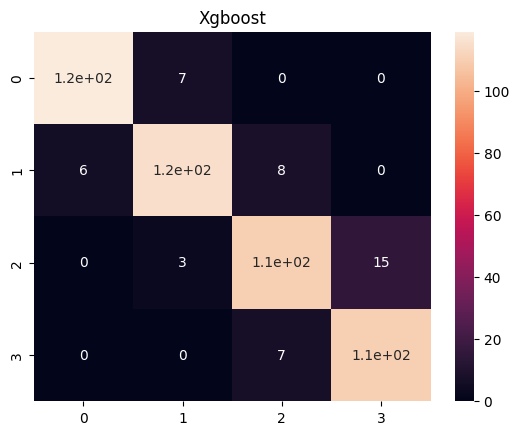

In [163]:
conf(xgb_pred,'Xgboost')

In [164]:
classi(xgb_pred,'Xgboost')

Xgboost
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       126
           1       0.92      0.89      0.91       129
           2       0.88      0.86      0.87       128
           3       0.88      0.94      0.91       117

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



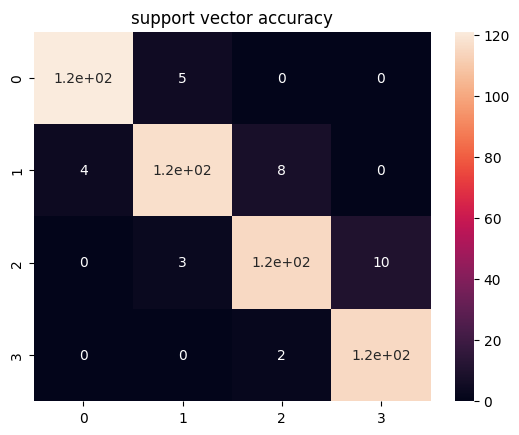

In [165]:
conf(scv_pred,'support vector accuracy')

In [166]:
classi(scv_pred,'support vector accuracy')

support vector accuracy
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       126
           1       0.94      0.91      0.92       129
           2       0.92      0.90      0.91       128
           3       0.92      0.98      0.95       117

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



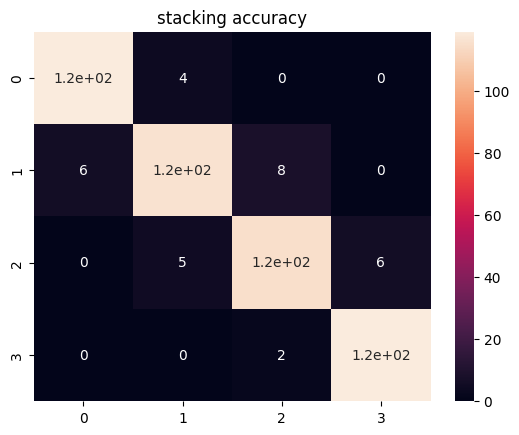

In [167]:
conf(sc_pred,'stacking accuracy')

In [168]:
classi(sc_pred,'stacking accuracy')

stacking accuracy
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       123
           1       0.93      0.89      0.91       130
           2       0.92      0.91      0.92       126
           3       0.95      0.98      0.97       121

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [169]:
evaluation

Model  accuracy
0                Stacking     0.938
1  Support Vector Machine     0.936
2                 xgboost     0.908
3              Naive Bays     0.808
4          KNN classifier     0.752

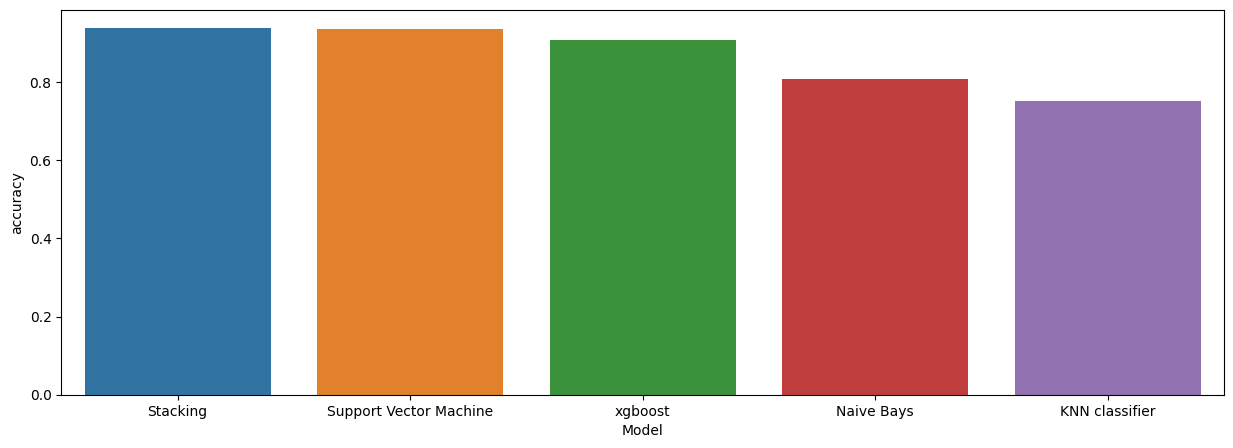

In [170]:
plt.figure(figsize=(15,5))
sns.barplot(x='Model',y='accuracy',data=evaluation)
plt.show()

# Conclusion

- From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.

- Half the devices have Bluetooth, and half don’t
there is a gradual increase in battery as the price range increases
Ram has continuous increase with price range while moving from Low cost to Very high cost.

- Costly phones are lighter.

- RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

- Form all the above experiments we can conclude that KNN Classifier,Stacking, XGboosting, Naive Bays Classifier and Stacking Classifier with using hyperparameters we got the best results.

